# Mount and Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/My Drive/Cardiac Project/Network_phase/mutgan

/content/drive/.shortcut-targets-by-id/1T4XU2DwFBpucge5DbMQ0wVZaRLkXQ564/Cardiac Project/Network_phase/mutgan


In [ ]:
!pip install neurite

     |████████████████████████████████| 86 kB 3.2 MB/s 


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
import neurite as ne
import random

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Runner

## Data

In [ ]:
# create dataset.
dataset_ = []
for ok in ['ok1,2', 'ok3' , 'ok4' , 'ok5']:
    ok_path = "../dataset/" + ok + '/' 
    patient_ids = os.listdir(ok_path)
    for patient_id in patient_ids:
        patient_path = ok_path + patient_id
        print(patient_id, end=", " )
        patient_data = read_a_patient_data(patient_path)
        dataset_.append(patient_data)

dataset = [item for sublist in dataset_ for item in sublist]

# save dataset.
with open('./dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

423841, 510347, 746603, 928508, 1136533, 1216198, 1247592, 1513957, 1515081, 1521169, 1521531, 1532303, 1536189, 1536656, 1544054, 1550461, 1551489, 1558213, 1579030, 1584473, 1584634, 1595517, 1527564, 1557463, 1592107, 1612583, 1616960, 1602959, 1608412, 1617584, 1608050, 1601149, 1606622, 1607269, 1431283, 1283504, 1417818, 1412200, 1458307, 1421322, 1449130, 1421246, 1461340, 1482797, 1493313, 1506521, 1500375, 1506547, 1512085, 1509723, 1467583, 1473669, 1478427, 777161, 1398155, 1429840, 1516218, 1548638, 903703, 1535532, 1523435, 670643, 1498178, 

In [ ]:
# load dataset
with open('./dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [ ]:
# reshape for ConvLSTM
dataset_ = []
for data in dataset:
    cine_seri, mask = data
    cine_seri = cine_seri.reshape(25, 64, 64)
    mask = mask.reshape(64, 64)
    dataset_.append((cine_seri, mask))

dataset = dataset_

### visualize

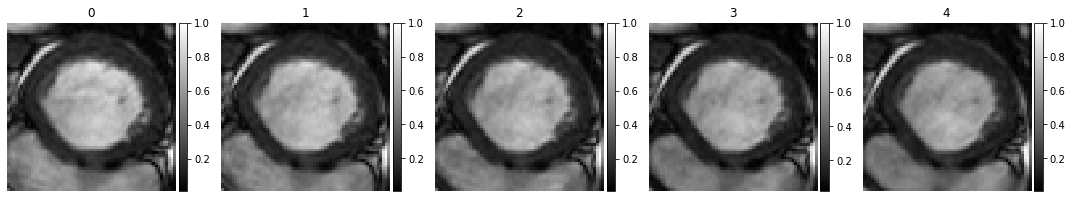

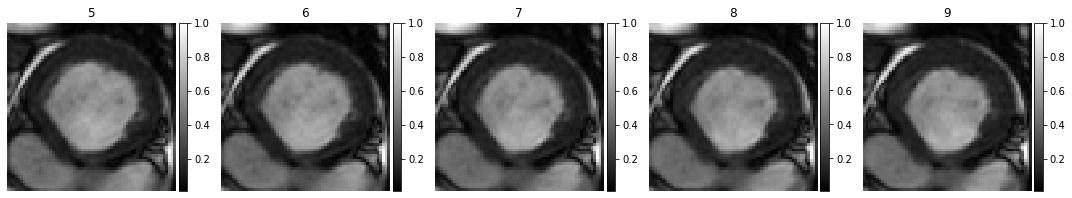

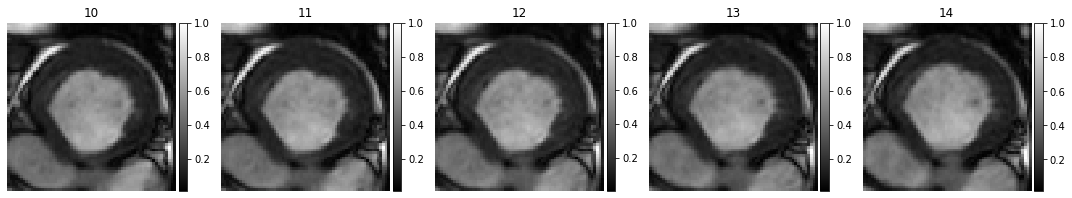

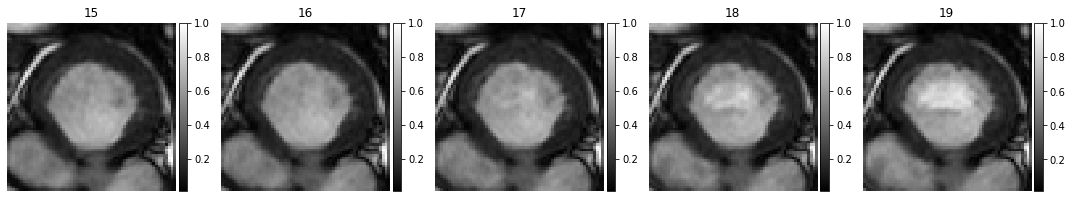

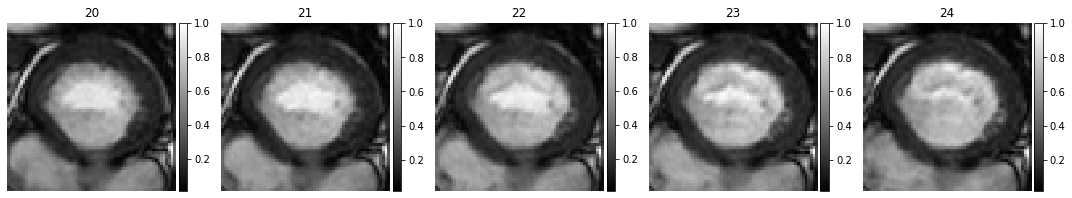

In [ ]:
 idx = np.random.choice(len(dataset_), 1)[0]
 cine_seri, mask = dataset_[idx]

# visualize
frames = [cine_seri[i].cpu().numpy() for i in range(cine_seri.shape[0])]
for i in [0, 5, 10, 15, 20]:
    ne.plot.slices(frames[i:i+5], cmaps=['gray'], do_colorbars=True, titles=list(range(i, i+5)), imshow_args=[{'origin':'lower'}]);

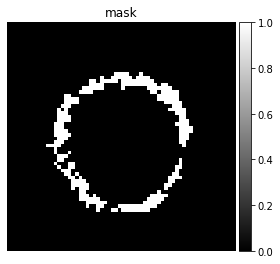

In [ ]:
ne.plot.slices([mask], cmaps=['gray'], do_colorbars=True, titles=['mask'], imshow_args=[{'origin':'lower'}], width=4);

## Train

In [118]:
sequence_length = 25 
num_epochs = 200
learning_rate = 0.001

In [119]:
random.shuffle(dataset)
len(dataset)

202

### Fold 1 ###


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


epoch: 0 loss: -0.030819375067949295
epoch: 10 loss: -0.04120537266135216
epoch: 20 loss: -0.04576650261878967
epoch: 30 loss: -0.0473361499607563
epoch: 40 loss: -0.04755387455224991
epoch: 50 loss: -0.04821903258562088
epoch: 60 loss: -0.04846600443124771
epoch: 70 loss: -0.048673905432224274
epoch: 80 loss: -0.0494999885559082
epoch: 90 loss: -0.04833768308162689
epoch: 100 loss: -0.051139697432518005
epoch: 110 loss: -0.05042129009962082
epoch: 120 loss: -0.05124719813466072
epoch: 130 loss: -0.05185241624712944
epoch: 140 loss: -0.05203051492571831
epoch: 150 loss: -0.05273798853158951
epoch: 160 loss: -0.05212738364934921
epoch: 170 loss: -0.03874039277434349
epoch: 180 loss: -0.051727812737226486
epoch: 190 loss: -0.0529470220208168


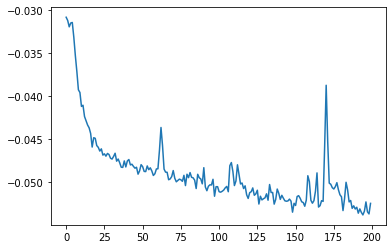

Dice-Score for fold 1 : 0.002865547
Accuracy for fold 1 : 0.91589355
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Fold 2 ###
epoch: 0 loss: -0.031027205288410187
epoch: 10 loss: -0.041791606694459915
epoch: 20 loss: -0.044474344700574875
epoch: 30 loss: -0.046720825135707855
epoch: 40 loss: -0.04760301485657692
epoch: 50 loss: -0.04821302741765976
epoch: 60 loss: -0.0487600639462471
epoch: 70 loss: -0.048917438834905624
epoch: 80 loss: -0.049672599881887436
epoch: 90 loss: -0.04950284585356712
epoch: 100 loss: -0.05098710209131241
epoch: 110 loss: -0.05096788704395294
epoch: 120 loss: -0.051961470395326614
epoch: 130 loss: -0.05034136027097702
epoch: 140 loss: -0.05138556286692619
epoch: 150 loss: -0.05247412249445915
epoch: 160 loss: -0.05265994742512703
epoch: 170 loss: -0.0523931123316288
epoch: 180 loss: -0.0484951846301555

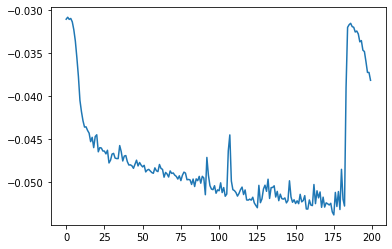

Dice-Score for fold 2 : 0.2098229
Accuracy for fold 2 : 0.7114563
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Fold 3 ###
epoch: 0 loss: -0.03147656470537186
epoch: 10 loss: -0.03821301460266113
epoch: 20 loss: -0.04218514636158943
epoch: 30 loss: -0.04534033685922623
epoch: 40 loss: -0.04685799777507782
epoch: 50 loss: -0.04856572300195694
epoch: 60 loss: -0.04811828210949898
epoch: 70 loss: -0.04731176421046257
epoch: 80 loss: -0.05086977034807205
epoch: 90 loss: -0.049915291368961334
epoch: 100 loss: -0.05026494339108467
epoch: 110 loss: -0.051580071449279785
epoch: 120 loss: -0.048658356070518494
epoch: 130 loss: -0.051481906324625015
epoch: 140 loss: -0.04296600818634033
epoch: 150 loss: -0.05153939872980118
epoch: 160 loss: -0.05092238262295723
epoch: 170 loss: -0.05228331685066223
epoch: 180 loss: -0.05208912491798401
ep

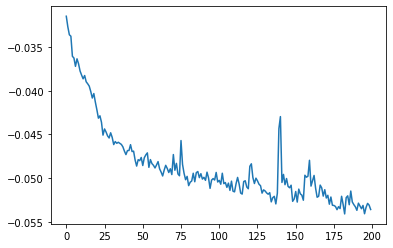

Dice-Score for fold 3 : 0.013646399
Accuracy for fold 3 : 0.916626
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Fold 4 ###
epoch: 0 loss: -0.031015807762742043
epoch: 10 loss: -0.03892993927001953
epoch: 20 loss: -0.045528706163167953
epoch: 30 loss: -0.04712658375501633
epoch: 40 loss: -0.04826357588171959
epoch: 50 loss: -0.04783669114112854
epoch: 60 loss: -0.04815056174993515
epoch: 70 loss: -0.04982142522931099
epoch: 80 loss: -0.0491066612303257
epoch: 90 loss: -0.04995330050587654
epoch: 100 loss: -0.05030624568462372
epoch: 110 loss: -0.04326310008764267
epoch: 120 loss: -0.0500248558819294
epoch: 130 loss: -0.05049334093928337
epoch: 140 loss: -0.05110203102231026
epoch: 150 loss: -0.050435926765203476
epoch: 160 loss: -0.05262003466486931
epoch: 170 loss: -0.051926854997873306
epoch: 180 loss: -0.05292190611362457
epo

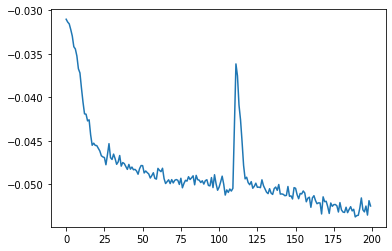

Dice-Score for fold 4 : -0.05728188
Accuracy for fold 4 : 0.8629761
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Fold 5 ###
epoch: 0 loss: -0.029753228649497032
epoch: 10 loss: -0.031660668551921844
epoch: 20 loss: -0.03654054179787636
epoch: 30 loss: -0.03802138566970825
epoch: 40 loss: -0.03913367912173271
epoch: 50 loss: -0.03904031962156296
epoch: 60 loss: -0.040818557143211365
epoch: 70 loss: -0.04136168584227562
epoch: 80 loss: -0.043898023664951324
epoch: 90 loss: -0.047970760613679886
epoch: 100 loss: -0.04753828048706055
epoch: 110 loss: -0.048439785838127136
epoch: 120 loss: -0.04868302866816521
epoch: 130 loss: -0.04787655919790268
epoch: 140 loss: -0.04854446277022362
epoch: 150 loss: -0.04931257292628288
epoch: 160 loss: -0.04881782829761505
epoch: 170 loss: -0.049332838505506516
epoch: 180 loss: -0.049731202423572

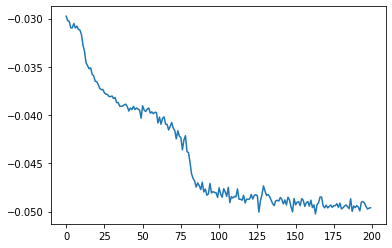

Dice-Score for fold 5 : -0.09582728
Accuracy for fold 5 : 0.84191895
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dice-Score:  0.014645135
Accuracy:  0.84191895


In [120]:
dice_scores = []
accuracies = []

for i, k in enumerate([0, 40, 80, 120, 160]):
    print("### Fold", i+1, "###")

    # data_loaders
    train_dataset , test_dataset = dataset[0:k] + dataset[k+40:], dataset[k:k+40]
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    valid_loader = DataLoader(test_dataset ,batch_size=32, shuffle=True)

    # model
    model = ConvLSTM(input_dim=1, hidden_dim=1, kernel_size=(9, 9), num_layers=1, batch_first=True, bias=True, return_all_layers=False)
    model = model.to(device)

    # loss and optimizer
    dice_loss = DiceLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # train
    train(model, train_loader)

    # predict
    masks, pred_masks, dice_score = test(model, valid_loader)
    dice_scores.append(dice_score.cpu().numpy())
    accuracies = [accuracy(pred_masks, masks).cpu().numpy()]

    print("Dice-Score for fold", i+1, ":", dice_scores[-1])
    print("Accuracy for fold", i+1, ":", accuracies[-1])
    print('-' * 200)
    print()

print("Dice-Score: ", np.mean(dice_scores))
print("Accuracy: ", np.mean(accuracies))

## Visualize

In [ ]:
def binary(input_):
    zeros = torch.zeros_like(input_)
    ones = torch.ones_like(input_)
    return torch.where(input_ > 0.5, ones, zeros)    

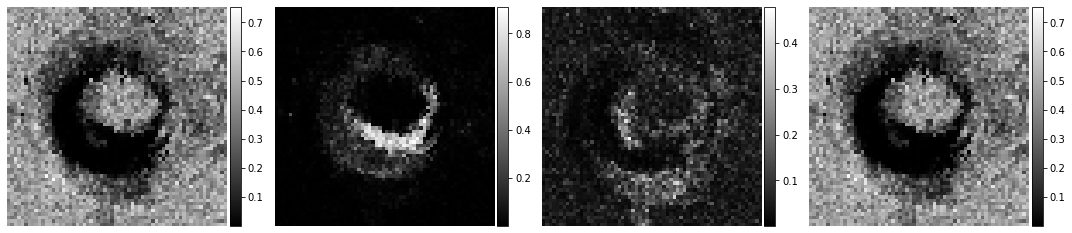

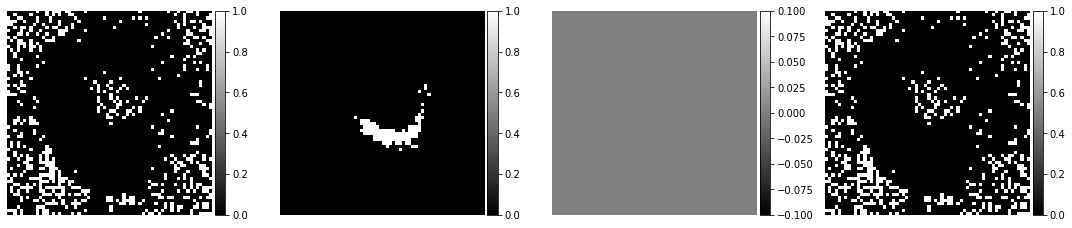

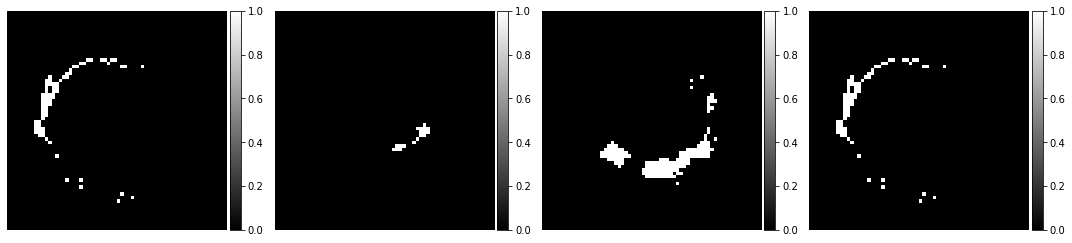

In [ ]:
idx = np.random.choice(range(masks.shape[0]), 4)

pred_masks_ = [pred_masks[i].cpu().numpy().reshape((64,64)) for i in idx]
pred_masks_binary_ = [binary(pred_masks[i]).cpu().numpy().reshape((64,64)) for i in idx]
masks_ = [masks[i].cpu().numpy().reshape((64,64)) for i in idx]

ne.plot.slices(pred_masks_, cmaps=['gray'], do_colorbars=True, imshow_args=[{'origin':'lower'}]);
ne.plot.slices(pred_masks_activate_, cmaps=['gray'], do_colorbars=True, imshow_args=[{'origin':'lower'}]);
ne.plot.slices(masks_, cmaps=['gray'], do_colorbars=True, imshow_args=[{'origin':'lower'}]);

# Code

## Data

In [ ]:
def preprocess_mask(mask):
    new_mask = np.zeros((64, 64))
    mask = np.where(mask>101 , mask , 0)
    mask = np.where(mask !=0 , 1 , 0)
    return mask

In [ ]:
def read_a_patient_data(main_path):
    folder_nums = os.listdir(main_path)
    folder_nums = [f for f in folder_nums if len(f) == 1]
    dataset = []
    for folder_num in folder_nums:
        folder_path = main_path + "/" + folder_num
        files_in_folder_num = os.listdir(folder_path)
        if "cine_seri" not in files_in_folder_num:
                continue
        for file_in_folder_num in files_in_folder_num:
            seri_mask_dataset = []
            if "cine_seri" in file_in_folder_num:
                f_dataset = []
                cine_seri_folder = folder_path+"/"+file_in_folder_num
                images = os.listdir(cine_seri_folder)
                images = sorted(images)
                #print(cine_seri_folder , len(images))

                for image_name in images:
                    image_path = cine_seri_folder + "/" + image_name
                    image = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE)
                    image = image/255
                    image = image.astype("float")
                    image = transforms.ToTensor()(image)
                    image = image.reshape(-1)
                    f_dataset.append(image)
            if "mask" in file_in_folder_num:
                mask_path = folder_path+"/"+file_in_folder_num
                mask = cv2.imread(mask_path , cv2.IMREAD_GRAYSCALE)
                mask = preprocess_mask(mask)
                mask = mask.reshape(-1)
        f_dataset = torch.stack(f_dataset) 
        dataset.append((f_dataset , mask))      
    return dataset

## Model

In [ ]:
class ConvLSTM(nn.Module):

    """
    Parameters:
        input_dim: Number of channels in input
        hidden_dim: Number of hidden channels
        kernel_size: Size of kernel in convolutions
        num_layers: Number of LSTM layers stacked on each other
        batch_first: Whether or not dimension 0 is the batch or not
        bias: Bias or no bias in Convolution
        return_all_layers: Return the list of computations for all layers
        Note: Will do same padding.
    Input:
        A tensor of size B, T, C, H, W or T, B, C, H, W
    Output:
        A tuple of two lists of length num_layers (or length 1 if return_all_layers is False).
            0 - layer_output_list is the list of lists of length T of each output
            1 - last_state_list is the list of last states
                    each element of the list is a tuple (h, c) for hidden state and memory
    Example:
        >> x = torch.rand((32, 10, 64, 128, 128))
        >> convlstm = ConvLSTM(64, 16, 3, 1, True, True, False)
        >> _, last_states = convlstm(x)
        >> h = last_states[0][0]  # 0 for layer index, 0 for h index
    """

    def __init__(self, input_dim, hidden_dim, kernel_size, num_layers,
                 batch_first=False, bias=True, return_all_layers=False):
        super(ConvLSTM, self).__init__()

        self._check_kernel_size_consistency(kernel_size)

        # Make sure that both `kernel_size` and `hidden_dim` are lists having len == num_layers
        kernel_size = self._extend_for_multilayer(kernel_size, num_layers)
        hidden_dim = self._extend_for_multilayer(hidden_dim, num_layers)
        if not len(kernel_size) == len(hidden_dim) == num_layers:
            raise ValueError('Inconsistent list length.')

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.kernel_size = kernel_size
        self.num_layers = num_layers
        self.batch_first = batch_first
        self.bias = bias
        self.return_all_layers = return_all_layers

        cell_list = []
        for i in range(0, self.num_layers):
            cur_input_dim = self.input_dim if i == 0 else self.hidden_dim[i - 1]

            cell_list.append(ConvLSTMCell(input_dim=cur_input_dim,
                                          hidden_dim=self.hidden_dim[i],
                                          kernel_size=self.kernel_size[i],
                                          bias=self.bias))

        self.cell_list = nn.ModuleList(cell_list)

    def forward(self, input_tensor, hidden_state=None):
        """
        Parameters
        ----------
        input_tensor: todo
            5-D Tensor either of shape (t, b, c, h, w) or (b, t, c, h, w)
        hidden_state: todo
            None. todo implement stateful
        Returns
        -------
        last_state_list, layer_output
        """
        if not self.batch_first:
            # (t, b, c, h, w) -> (b, t, c, h, w)
            input_tensor = input_tensor.permute(1, 0, 2, 3, 4)

        b, _, _, h, w = input_tensor.size()

        # Implement stateful ConvLSTM
        if hidden_state is not None:
            raise NotImplementedError()
        else:
            # Since the init is done in forward. Can send image size here
            hidden_state = self._init_hidden(batch_size=b,
                                             image_size=(h, w))

        layer_output_list = []
        last_state_list = []

        seq_len = input_tensor.size(1)
        cur_layer_input = input_tensor

        for layer_idx in range(self.num_layers):

            h, c = hidden_state[layer_idx]
            output_inner = []
            for t in range(seq_len):
                h, c = self.cell_list[layer_idx](input_tensor=cur_layer_input[:, t, :, :, :],
                                                 cur_state=[h, c])
                output_inner.append(h)

            layer_output = torch.stack(output_inner, dim=1)
            cur_layer_input = layer_output

            layer_output_list.append(layer_output)
            last_state_list.append([h, c])

        if not self.return_all_layers:
            layer_output_list = layer_output_list[-1:]
            last_state_list = last_state_list[-1:]

        return layer_output_list, last_state_list

    def _init_hidden(self, batch_size, image_size):
        init_states = []
        for i in range(self.num_layers):
            init_states.append(self.cell_list[i].init_hidden(batch_size, image_size))
        return init_states

    @staticmethod
    def _check_kernel_size_consistency(kernel_size):
        if not (isinstance(kernel_size, tuple) or
                (isinstance(kernel_size, list) and all([isinstance(elem, tuple) for elem in kernel_size]))):
            raise ValueError('`kernel_size` must be tuple or list of tuples')

    @staticmethod
    def _extend_for_multilayer(param, num_layers):
        if not isinstance(param, list):
            param = [param] * num_layers
        return param

In [ ]:
class ConvLSTMCell(nn.Module):

    def __init__(self, input_dim, hidden_dim, kernel_size, bias):
        """
        Initialize ConvLSTM cell.
        Parameters
        ----------
        input_dim: int
            Number of channels of input tensor.
        hidden_dim: int
            Number of channels of hidden state.
        kernel_size: (int, int)
            Size of the convolutional kernel.
        bias: bool
            Whether or not to add the bias.
        """

        super(ConvLSTMCell, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.kernel_size = kernel_size
        self.padding = kernel_size[0] // 2, kernel_size[1] // 2
        self.bias = bias

        self.conv = nn.Conv2d(in_channels=self.input_dim + self.hidden_dim,
                              out_channels=4 * self.hidden_dim,
                              kernel_size=self.kernel_size,
                              padding=self.padding,
                              bias=self.bias)

    def forward(self, input_tensor, cur_state):
        h_cur, c_cur = cur_state

        combined = torch.cat([input_tensor, h_cur], dim=1)  # concatenate along channel axis

        combined_conv = self.conv(combined)
        cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim=1)
        i = torch.sigmoid(cc_i)
        f = torch.sigmoid(cc_f)
        o = torch.sigmoid(cc_o)
        g = torch.tanh(cc_g)

        c_next = f * c_cur + i * g
        h_next = o * torch.tanh(c_next)

        return h_next, c_next

    def init_hidden(self, batch_size, image_size):
        height, width = image_size
        return (torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device),
                torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device))

In [ ]:
class LSTMGenerator(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMGenerator, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.conv1 = nn.Conv2d(in_channels=25, out_channels=64, kernel_size=2)
        self.leaky1 = nn.LeakyReLU(0.1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=25, kernel_size=2, padding=1)
        self.leaky2 = nn.LeakyReLU(0.1)

        self.lstm = nn.LSTM(self.input_size, self.hidden_size, self.num_layers, batch_first=True)
        self.fc1 = nn.Linear(self.hidden_size, input_size)
        self.softmax = nn.Softmax()
    
    def zero_state(self, batch_size):
        h = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        c = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        return (h, c)

    def forward(self, x, state):

        x = x.reshape(x.shape[0], 25 , 64 , 64).float().to(device)

        x = self.leaky1(self.conv1(x))
        x = self.leaky2(self.conv2(x))

        x = x.reshape(x.shape[0], 25 , -1)

        x, state = self.lstm(x, (state[0].to(device), state[1].to(device)))

        x = self.fc1(x)
        x = self.softmax(x)
        
        return x, state

## Loss

In [ ]:
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, pred, target, smooth=1e-5):
        
        N = pred.shape[0]
        pred = pred.view(N , -1)
        target = target.view(N , -1)
        
        intersection = (pred * target).sum(1)                            
        dice = (2.*intersection + smooth)/(pred.sum(1) + target.sum(1) + smooth)  
        return -dice.sum()/N

In [ ]:
def accuracy(pred, target):
    zeros = torch.zeros_like(pred)
    ones = torch.ones_like(pred)
    pred = torch.where(pred > 0.5, ones, zeros)
    target = torch.where(target > 0.5, ones, zeros)
    acc = torch.sum(pred == target)
    return acc / len(pred.view(-1))

## Train

In [ ]:
def train(model , train_loader):    
    model.train()
    all_loss = []
    softmax = nn.Softmax()
    for i in range(num_epochs):
        epoch_loss = 0

        for cine_seri, masks in train_loader:
          
            # set gradients to zero
            optimizer.zero_grad()

            masks = masks.to(device)

            # predict
            layer_outputs, last_states = model(cine_seri.float().unsqueeze(2).to(device))
            outputs = layer_outputs[0]  # 0 for layer index
            # c = last_states[0][1]       # 0 for layer index, 1 for c index
            # h = last_states[0][0]       # 0 for layer index, 0 for h index
            pred_masks = outputs[:, -1, ...].squeeze(1)
            pred_masks = softmax(pred_masks)

            # optimize loss 
            for pred_mask in pred_masks:
                torch.nn.functional.threshold(pred_masks * 255, threshold = 100 , value = 1, inplace=True)
            loss = dice_loss(pred_masks , masks)
            loss.backward()
            optimizer.step()
            
            # perform gradient clipping to prevent gradients from exploding
            _ = torch.nn.utils.clip_grad_norm_(model.parameters(), 2)
            
            epoch_loss += loss * cine_seri.shape[0]

        epoch_loss /= len(train_loader.dataset)
        all_loss.append(epoch_loss)
        
        if i%10 == 0:
            print(f"epoch: {i} loss: {epoch_loss}")
    plt.plot(range(len(all_loss)) , all_loss)
    plt.show()


## Test

In [ ]:
def test(model , test_loader):
    model.eval()
    softmax = nn.Softmax()
    with torch.no_grad():
        loss = 0
        d = []
        for cine_seri, masks in test_loader:
            cine_seri = cine_seri.to(device)
            masks = masks.to(device)
            
            # predict
            layer_outputs, last_states = model(cine_seri.float().unsqueeze(2).to(device))
            outputs = layer_outputs[0]  # 0 for layer index
            # c = last_states[0][1]       # 0 for layer index, 1 for c index
            # h = last_states[0][0]       # 0 for layer index, 0 for h index
            pred_masks = outputs[:, -1, ...].squeeze(1)
            pred_masks = softmax(pred_masks)
            
            loss += dice_loss(pred_masks, masks) * cine_seri.shape[0]

    dice_score = -(loss / len(test_loader.dataset))
     
    return masks , pred_masks , dice_score 